In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
#customer ID is irrelevant
df = df.drop(['customerID'],axis=1)

In [6]:
colcon = ['TotalCharges','MonthlyCharges']
for c in colcon:
    df[c]=pd.to_numeric(df[c],errors='coerce')

In [7]:
df['MonthlyCharges']

0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7043, dtype: float64

In [8]:
df['TotalCharges'].isnull().sum()

11

In [9]:
#dropping nan rows
df=df.dropna(subset=['TotalCharges'])

In [11]:
df['TotalCharges'].isnull().sum()

0

In [16]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [17]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [18]:
df['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [19]:
df['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [20]:
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [21]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [22]:
df['MonthlyCharges'].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

In [23]:
df['TotalCharges'].unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [24]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

C:\Users\91934\AppData\Local\Temp\ipykernel_28988\231894250.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['tenure'])
C:\Users\91934\AppData\Local\Temp\ipykernel_28988\231894250.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MonthlyCharges'])
C:\Users\91934\AppData\Local\Temp\ip

<Axes: xlabel='TotalCharges', ylabel='Density'>

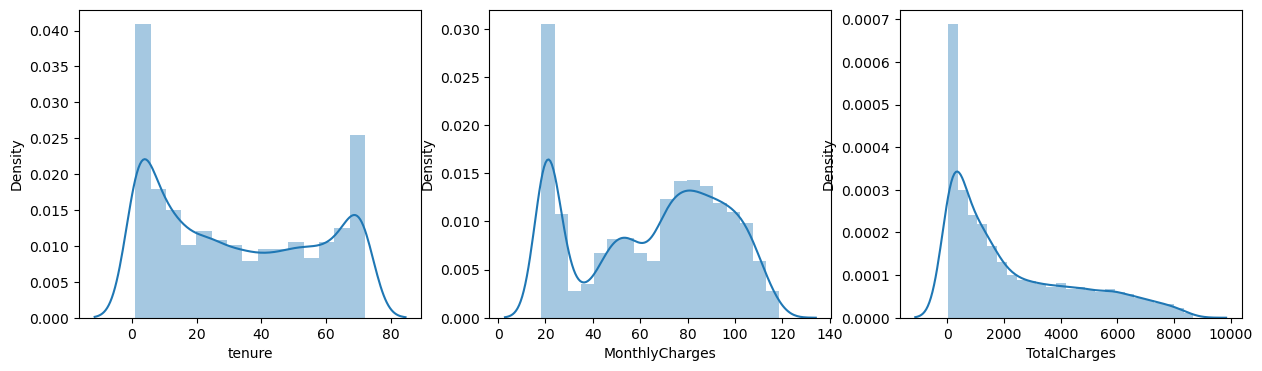

In [25]:
#Visual  analysis
import seaborn as sns
plt.figure(figsize=(15,4))
plt.subplot(131)
sns.distplot(df['tenure'])
plt.subplot(132)
sns.distplot(df['MonthlyCharges'])
plt.subplot(133)
sns.distplot(df['TotalCharges'])

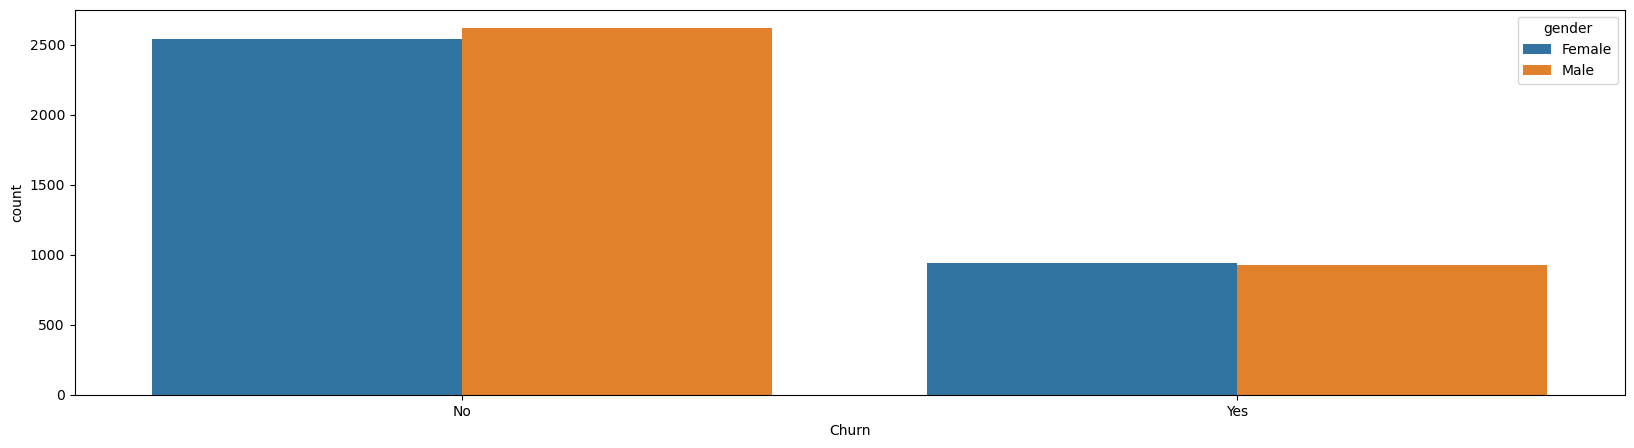

In [26]:
plt.figure(figsize=(20,5))
sns.countplot(df, x='Churn', hue='gender');

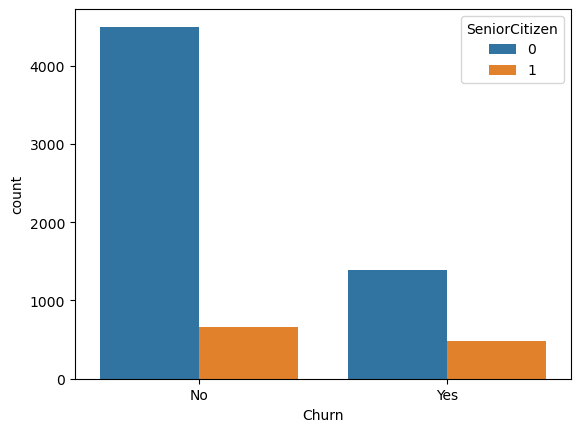

In [27]:
sns.countplot(df, x='Churn', hue='SeniorCitizen');

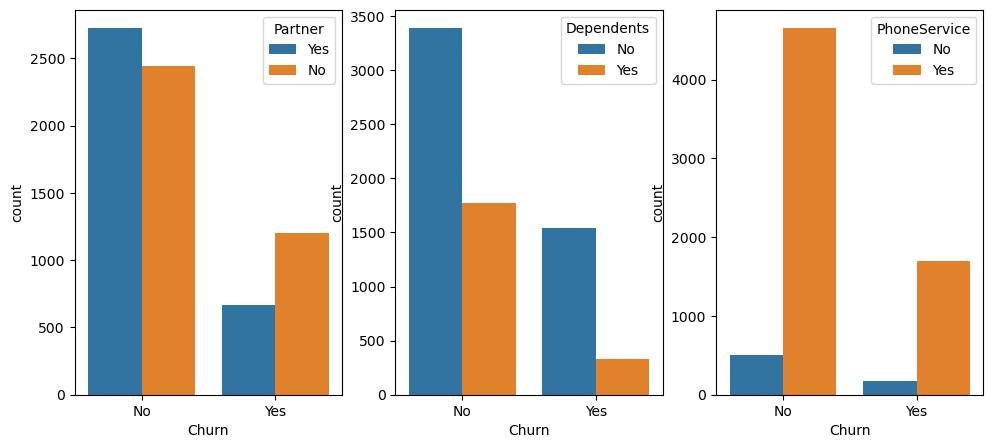

In [28]:
plt.figure(figsize=(20,5))
plt.subplot(153)
sns.countplot(df, x='Churn', hue='Partner');
plt.subplot(154)
sns.countplot(df, x='Churn', hue='Dependents');
plt.subplot(155)
sns.countplot(df, x='Churn', hue='PhoneService');

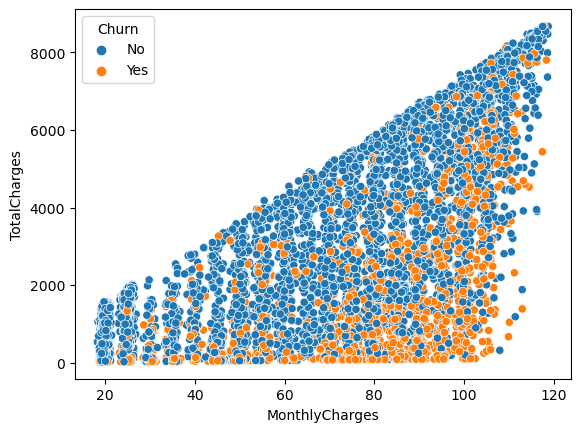

In [29]:
#scatter plots
sns.scatterplot(x=df['MonthlyCharges'], y=df['TotalCharges'], hue=df['Churn']);

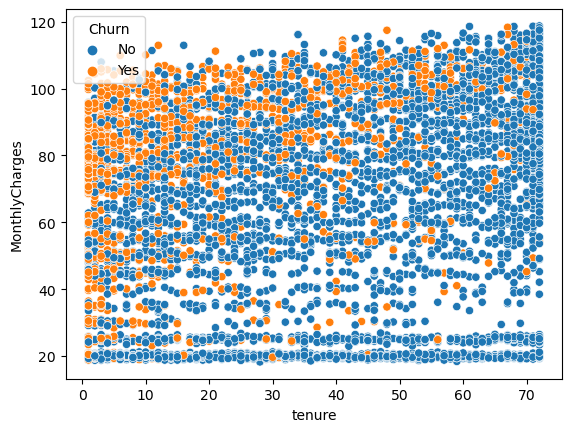

In [30]:
sns.scatterplot(x=df['tenure'], y=df['MonthlyCharges'], hue=df['Churn']);

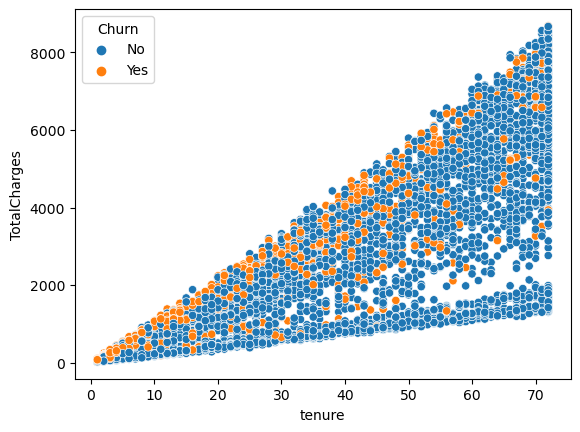

In [31]:
sns.scatterplot(x=df['tenure'], y=df['TotalCharges'], hue=df['Churn']);


In [32]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder() 

In [33]:
#identifying categorical features
categorical_features = []
for col in df.columns:
    if len(df[col].unique())<=10:
        categorical_features.append(col)

In [34]:
for col in categorical_features:
    df[col] = df[[col]].apply(lab.fit_transform)

In [35]:
df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

<Axes: >

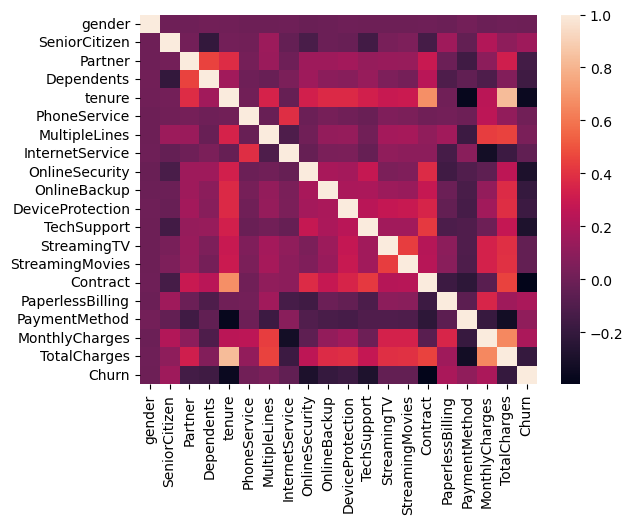

In [36]:
#correlation
sns.heatmap(df.corr())

In [37]:
from sklearn.model_selection import train_test_split
x = df.drop(['Churn'],axis=1)
y = df['Churn']
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)

In [38]:
#standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [41]:
x_train_std = sc.transform(X_train)
x_test_std = sc.transform(X_test)

In [43]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 1000)

In [44]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7938388625592417

In [47]:
#for standardization values apply logistic regression
model_2 = LogisticRegression(max_iter=1000)

In [48]:
model.fit(x_train_std, y_train)
y_pred = model.predict(x_test_std)

In [49]:
accuracy_score(y_test, y_pred)

0.8004739336492891

In [51]:
# predicting with Standardization values have high accuracy 